In [4]:
!pip install yfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.5/939.5 kB 71.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 119.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 107.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 116.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 35.3 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.7-py3-none-any.whl size=138905 sha256=d25ed33559eb8a73f88feae1686df264b0

In [5]:
import yfinance as yf

# Download Tesla stock data
tesla_data = yf.Ticker("TSLA")
tesla_stock = tesla_data.history(period="max")

# Display the first few rows of Tesla stock data
tesla_stock.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [9]:
!pip install requests beautifulsoup4


In [15]:
!pip install pandas


In [31]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}
response = requests.get(url, headers=headers)
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    data = []
    table = soup.find('table', class_='historical_data_table table')
    rows = table.find_all('tr')[1:]
    for row in rows:
        columns = row.find_all('td')
        if len(columns) >= 2: 
            year = columns[0].text.strip()
            revenue = columns[1].text.strip().replace('$', '').replace('B', '').replace(',', '')
            data.append({'Year': year, 'Revenue': float(revenue)}) 
    tesla_revenue = pd.DataFrame(data)
    print(tesla_revenue.tail()) 
else:
    print(f"Failed to retrieve data: {response.status_code}")


    Year  Revenue
10  2013   2013.0
11  2012    413.0
12  2011    204.0
13  2010    117.0
14  2009    112.0


In [32]:
import yfinance as yf
gme_data = yf.download("GME", start="2023-01-01", end="2024-01-01")
gme_data.reset_index(inplace=True)
print(gme_data.head())


[*********************100%***********************]  1 of 1 completed

        Date       Open       High        Low      Close  Adj Close   Volume
0 2023-01-03  18.639999  19.260000  17.090000  17.200001  17.200001  5135200
1 2023-01-04  17.250000  17.930000  16.900000  17.320000  17.320000  3939300
2 2023-01-05  17.059999  17.260000  15.890000  16.219999  16.219999  6066200
3 2023-01-06  16.000000  16.570000  15.410000  16.459999  16.459999  4823400
4 2023-01-09  16.650000  17.129999  16.360001  16.379999  16.379999  3522600


In [39]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = 'https://www.macrotrends.net/stocks/charts/GME/game-stop/revenue'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}
response = requests.get(url, headers=headers)
if response.status_code != 200:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")
else:
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table', class_='historical_data_table table')
    if table is None:
        print("Table not found. Please check the URL or the table structure.")
    else:
        headers = ['Year', 'Revenue']
        rows = []
        for row in table.find_all('tr')[2:]: 
            cols = row.find_all('td')
            if cols: 
                year = cols[0].text.strip()  
                revenue = cols[1].text.strip().replace('$', '').replace(',', '') 
                rows.append([year, revenue])
        gme_revenue = pd.DataFrame(rows, columns=headers)
        gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')
        print(gme_revenue.tail())


    Year  Revenue
10  2013     8887
11  2012     9551
12  2011     9474
13  2010     9078
14  2009     8806


In [42]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.7/163.7 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 127.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 126.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 104.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 14.6 MB/s eta 0:00:00


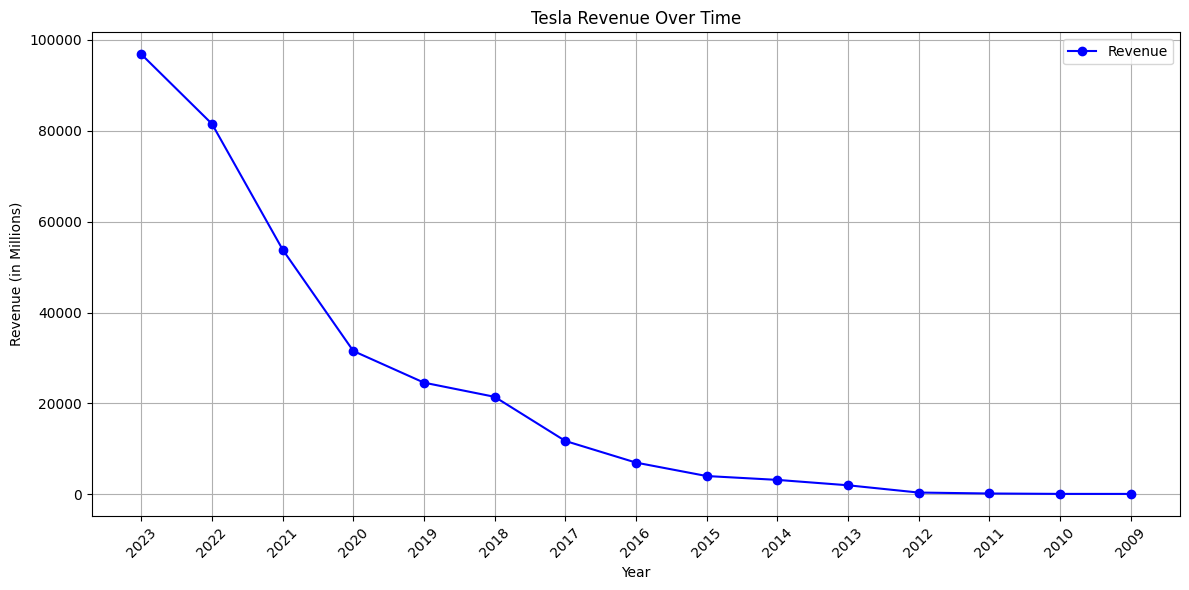

In [68]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table', class_='historical_data_table')
rows = table.find_all('tr')
data = []
for row in rows[1:]: 
    cols = row.find_all('td')
    if len(cols) >= 2: 
        year = cols[0].text.strip()
        revenue_str = cols[1].text.strip()
        revenue_str = revenue_str.replace('$', '').replace(',', '') 
        revenue = float(revenue_str)
        data.append([year, revenue]) 
tesla_data = pd.DataFrame(data, columns=['Year', 'Revenue'])
output = tesla_data[['Year', 'Revenue']]
def make_graph(stock_data):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Year'], stock_data['Revenue'], marker='o', label='Revenue', color='blue')
    plt.title('Tesla Revenue Over Time')
    plt.xlabel('Year')
    plt.ylabel('Revenue (in Millions)')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
tesla_data = pd.DataFrame(data, columns=['Year', 'Revenue'])
make_graph(tesla_data)    

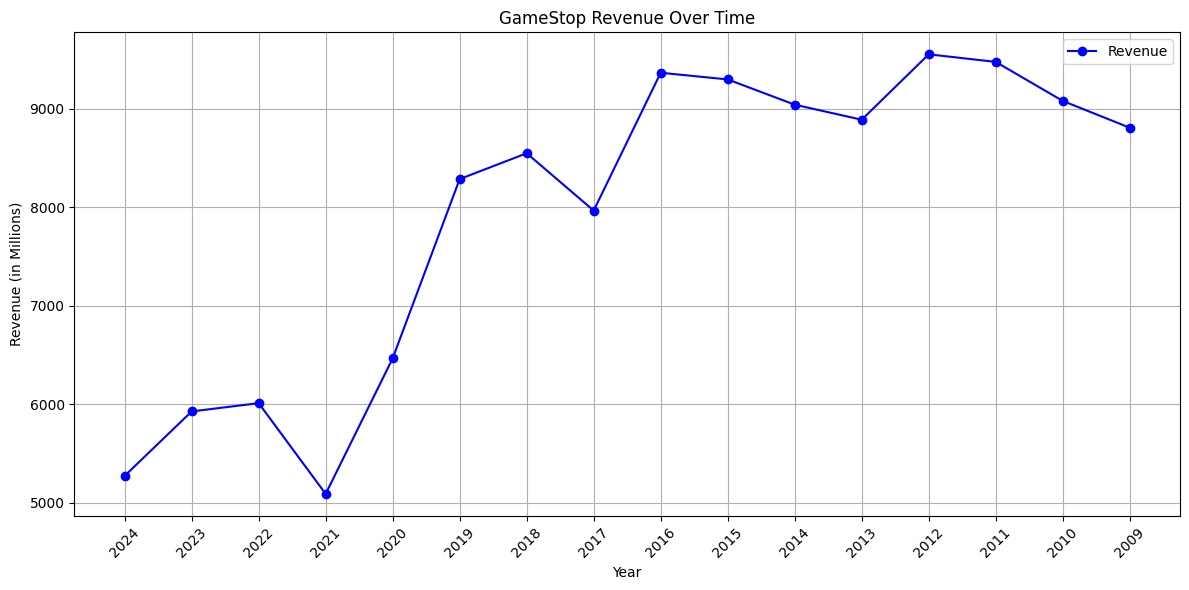

In [69]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table', class_='historical_data_table table')
rows = table.find_all('tr')
data = []
for row in rows[1:]: 
    cols = row.find_all('td')
    if len(cols) >= 2: 
        year = cols[0].text.strip()
        revenue_str = cols[1].text.strip()
        revenue_str = revenue_str.replace('$', '').replace(',', '') 
        revenue = float(revenue_str)
        data.append([year, revenue]) 
tesla_data = pd.DataFrame(data, columns=['Year', 'Revenue'])
output = tesla_data[['Year', 'Revenue']]
def make_graph(stock_data):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Year'], stock_data['Revenue'], marker='o', label='Revenue', color='blue')
    plt.title('GameStop Revenue Over Time')
    plt.xlabel('Year')
    plt.ylabel('Revenue (in Millions)')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
tesla_data = pd.DataFrame(data, columns=['Year', 'Revenue'])
make_graph(tesla_data)    